In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
sub = pd.read_csv('/kaggle/input/data-science-bowl-2019/sample_submission.csv')
sub.to_csv('submission.csv',index = 'false')

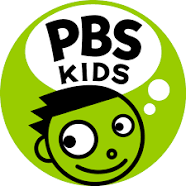

# 2019 Data Science Bowl

## Introduction

In [ ]:
train = pd.read_csv('/kaggle/input/data-science-bowl-2019/train.csv')

In [ ]:
test = pd.read_csv('/kaggle/input/data-science-bowl-2019/test.csv')

In [ ]:
train_labels = pd.read_csv ('/kaggle/input/data-science-bowl-2019/train_labels.csv')

In [ ]:
submission = pd.read_csv ('/kaggle/input/data-science-bowl-2019/sample_submission.csv')

### Research question and problem framing

#### **Research question**

Based on the kaggle competition, we are trying to predict scores on in-game assessments and build algorithm that will help better design games.

The link for the kaggle competition as follows: https://www.kaggle.com/c/data-science-bowl-2019

**Who:** This is for the PBS kids television company and the U.S. Department of Education 

**What:**  PBS kids is finding a way to improve and help children learn important skills 

**When:** This problem needs to complete as soon as possible because then the department of education can look into other ways to improve kids skills.

**Why:** In this problem, We are trying to improve kids skills with STEM (Science, Technology, Engineering and Math)

**Where:** This problem is occuring around the country because we are not providing the education in STEM.


#### **Problem framing**

## Background

In this Kaggle case competition, there are 4 type of files of data. The dataset can be found on kaggle competition webpage.
The link for this dataset as follows: https://www.kaggle.com/c/data-science-bowl-2019/

### Loading Dataset / install package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

import plotly.express as pe
import seaborn as sns
sns.set()

In [ ]:
train

In [ ]:

test

### Research methodology

First, we look at the dataset for the competition and we will be looking the dataset to see if their any data missing. This help keep the data accurate and help with the report.

Next we look into what is the best models for this competition. One model that will be used is the KNN model. KNN model stand for k-nearest neighbors, which helps solve classification and regression problems. We made the KNN n_neighbors to equal to 3. Also we made a decision tree in this competiion. The decision tree is when we take two or more possible outcome and make in the tree-like chart format. We made the depth of the decsion tree of 10.

Lastly, after all the models are made, we will forcast what is the best shows for the  U.S. Department of Education. Also trying perdict shows that help with STEM (Science, Technology, Engineering and Math). In conclusion, we trying to help the the  U.S. Department of Education in making more tv shows related to STEM. In this report, we use 2 models, which are KNN model and the decision tree model.

### Description of the data

Based on this kaggle competition, We trying to forcast possible show that helps the  U.S. Department of Education related to STEM. STEM stand for science, Technology, engineering and Math. 

### Overview of the data

#### Types of features (variables)


##### basic statistical details

In [ ]:
desc_test = test.describe() 
desc_test

In [ ]:
desc_train = train.describe() 
desc_train

##### CSV heading

* **event_id:** Make a unique identifier for the event type
* **game_session:** create a unique identifier grouping events within a single game or video play session.
* **timestamp:** Client-generated datetime
* **event_data:** Semi-structured JSON formatted string containing the events parameters.
* **installation_id:** Create unique identifier grouping game sessions within a single installed application instance.
* **event_count:** Incremental counter of events within a game session 
* **event_code:** Identifier of the event 'class'. Unique per game, but may be duplicated across games.
* **game_time:** Time in milliseconds since the start of the game session. 
* **title:** Title of the game or video.
* **type:** Media type of the game or video. Possible values are: 'Game', 'Assessment', 'Activity', 'Clip'.
* **world:** The section of the application the game or video belongs to.

In [ ]:
train.info()

Based on the code above  it shows the train dataset. Which contains 11 column in total. Event_id, game_session, timestamp, event_data, installation_id,title, type and world is an object. Event_count, event_code, game_time is an interger 

In [ ]:
test.info()

Based on the code above it shows the train dataset. Which contains 11 column in total and 8 is non-null object. There is 3 that is int64.

### Cleaning of the data

#### Missing data

In [ ]:
train.isnull()

In [ ]:
test.isnull()

As shown above, we can see that there are no missing value is this dataset and it is good to use both train and test dataset for the commpetition and report.

#### correlation

The corrplot is a chart for correlogram. A correlogram is a graph that measures the correlation matrix. It shows that the red color box is positive value and and the blue one is negative value.

In [ ]:
def chk_corr(df):
    corrs = train.corr()
    plt.figure(figsize = (7,7))
    # Heatmap of correlations
    sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
    plt.title('Correlation Heatmap');

In [ ]:
chk_corr(train)


In [ ]:
def chk_corr(df):
    corrs = test.corr()
    plt.figure(figsize = (7,7))
    # Heatmap of correlations
    sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
    plt.title('Correlation Heatmap');

In [ ]:
chk_corr(test)


Based on the correlation heatmap chart, it shows  relationship between two or more dimession. In Training dataset, event_code and event_count is 0.044 and in the testing dataset it is 0.07. In training dataset, game_time and event_count is 0.14 and in the testing dataset is 0.087. 

### Feature engineering

In [ ]:
#Import label encoder
from sklearn import preprocessing

#Create label encoder
le = preprocessing.LabelEncoder()

In [ ]:
#Merge train and train_lables dataframes
group = pd.merge(train, train_labels, on= ['game_session', 'installation_id', 'title']).sort_values(['game_session','installation_id'])
train.head()

In [ ]:
#Condense rows into summarized dataframe
group.groupby(['game_session', 'installation_id', 'title', 'type', 'world', 'num_correct', 'num_incorrect','accuracy_group'])\
.agg({'game_time':'sum', 'event_code':list})

In [ ]:
# First Feature
#group['title'] = group['title'].astype('category').cat.codes
title = le.fit_transform(group['title'])

#Second Feature
game_time = le.fit_transform(group['game_time'])
#Second Feature
world = le.fit_transform(group['world'])
#Second Feature
game_session = le.fit_transform(group['game_session'])
                                   
#Target variable from training labels
outcome = le.fit_transform(group['accuracy_group'])

In [ ]:
features = list(zip(world,game_time))

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size = .8)

In [ ]:

sc = StandardScaler() 
  
X_train1 = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

In [ ]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

pca

### The Models

#### KNN model

In [ ]:


model = KNeighborsClassifier(n_neighbors=3)


model.fit(X_train,y_train)

In [ ]:
predicted = model.predict(X_test)
predicted

Based on the KNN, we see the leaf_size is 30 which is the default one. The metrics is minkowski, metric params and n_jobs is none, n_neighbors is 3 p is 2 and weights is uniform. The weight for uniform means that all points in each neighborhood are weighted equally. For metrics is the measure of the distance metric to use for the tree and the default one is minkowski.

#### Decision Tree Classifier 

In [ ]:
final_model =  DecisionTreeClassifier(max_depth=10)

final_model.fit(X_train,y_train)


The decision Tree Classifier is flow chart that create look like a tree model which help with decisions and their possible outcomes. It shows that we made the depth (branches) no more 10. This is saying that outcome will not go passed 10 down.

#### Logistic regression

In [ ]:
# Fitting Logistic Regression To the training set 
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 


In [ ]:
# Predicting the test set result using 
# predict function under LogisticRegression 
y_pred = classifier.predict(X_test)
y_actu = classifier.predict(X_test)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred,  average='micro')
roc_auc = accuracy_score(y_test, y_pred)
print(f"F Score: {f1}")
print(f"Precision Score: {precision}")
print(f"Recall Score: {recall}")
print(f"ROC-AOC Score: {roc_auc}")

## Models evaluation and comparison

### Performance assessment and comparison

#### performance

##### Interaction using test dataset

In [ ]:
type_count = test['type'].value_counts().reset_index()
total = len(test)
type_count['percent'] = round((type_count['type']/total)*100,2)
print(type_count)

fig = pe.bar(type_count, x='index', y='type',
             hover_data=['index','percent'], color='type',
             labels={'type':'Type Count'}, height=400)
fig.show()

Using the test dataset in this competition, we can see the differen type of interest. It shows that 49.49% likes games, 40.32% activity, 8.87% of assessment and 1.32% clip for their interaction.  Based on the chart above, it shows the kids would like more games and activity in ineractive activity, It also shows that not much kids will like watching clips.

##### Interaction using train dataset

In [ ]:
type_count = train['type'].value_counts().reset_index()
total = len(train)
type_count['percent'] = round((type_count['type']/total)*100,2)
print(type_count)

fig = pe.bar(type_count, x='index', y='type',
             hover_data=['index','percent'], color='type',
             labels={'type':'Type Count'}, height=400)
fig.show()

Using the train dataset in this competition, we can see the differen type of interest. It shows that 51.10% likes games, 39.12% activity, 8.62% of assessment and 1.62% clip for their interaction.  Based on the chart above, it also shows that the kids would like more games and activity in interactive activity. Also, shows that not much kids will like watching clips.

##### Top games using the test dataset

In [ ]:
# Exploring Test Dataset.
test.shape
title_ins = test.groupby('title')['game_session'].count().reset_index()
title_ins.sort_values(by=['game_session'], inplace = True, ascending = False)
print(title_ins[0:10]) #this will print the top 10

fig = pe.bar(title_ins[0:10], x='title', y='game_session', #make a chart of the top 10 using game session
             hover_data=['title'], color='title',
             labels={'game_session':'game session Count'}, height=400, title = 'Highly played Games using test dataset')
fig.show()

Based on the chart above, it shows how bottle Filler is the most played game based on the test datset. It has 112223 game session. Scrub-A-Dub is the next played game with 96619. The lowest played game is Crystals Rule       with 46867 game session.

In [ ]:
import statsmodels.api as sm

X_train_2 = sm.add_constant(X_train) 
est = sm.OLS(y_train, X_train_2)
est2 = est.fit()

print("summary()\n",est2.summary())

##### KNN

KNN stand for k-nearest neighbors and it is used for solving classification and regression problems. In the KNN model above, it has algorithm='auto', a leaf size of 30 (which is the defult one), metric is 'minkowski', the n_neighbors is 3, and the p is 2. In KNN metric, minkowski is a measure of Normed vector space. 

##### Decision Tree 

A decision tree classifier is when you are measuring 2 or more possible output. In the decision tree, we kept the depth of 10 and the min_sample spilit is 2. This means that the tree will go 10 down each branch has 2 possible outcomes.

## Strengths and limitations of modals and suggestions for future improvement

### Strengths of models and improvement

The models can be improved by changing the n_neighbors in KNN. This will make and output a different result and it will change the KNN model. For the decision tree, we can improve it changing how much down we want it to go. For example, we can change 10 into 8 branches. Also, we can say make 3 possible outcomes instead for 2.

### Suggestion for improvement


Some improvement can be looking at are other models for this competition. The models are in 12 types of algorithms list below.

The 12 types of algoritham are:

* Regression Algorithms
* Instance-based Algorithms
* Regularization Algorithms
* Decision Tree Algorithms
* Bayesian Algorithms
* Clustering Algorithms
* Association Rule Learning Algorithms
* Artificial Neural Network Algorithms
* Deep Learning Algorithms
* Dimensionality Reduction Algorithms
* Ensemble Algorithms
* Other Algorithms

With the algorithm above, some models that can used in the competition is logistic regression, random forest, Principal Component Analysis (PCA), K-mean and linear regression.

Another example is using artifical neural network algorithms, we can make an interaction system. For example, while kids are learning stem, they can also talk and play with the system. This will help them learn stem and make in fun and playful for the kids.

### Conclusion

In conclusion,Based on the corralation chart, in Training dataset, event_code and event_count is 0.044 and in the testing dataset it is 0.07. In training dataset, game_time and event_count is 0.14 and in the testing dataset is 0.087. Also, we used two models, the knn and the decision tree. In the knn, the n_neighbour is 3 and p is 2. In the decision tree, the tree goes down 10 with 2 possible branch. In this report for the competition, we also look at the highest played game. The most played game in the test dataset is bottle flitter with 112223 game session.

In this competition, we are trying to predict the best game and help learning outcome for the dataset in PBS Kids. As shown above, both test and training shows that for interaction kids will choose games. Also, it shows that kids are more interested in water games. PBS Kids and U.S. Department of Education should use the stem and make a fun water game. For example, they can make a fish game in where their are learning different fishes and still having fun playing the game.